In [1]:
# Standard library imports
import os
import sys
import re
import json
import numpy as np
import pandas as pd
import nest_asyncio
nest_asyncio.apply()
import asyncio

# Jupyter notebook specific imports
%reload_ext autoreload
%autoreload 2

# Add project root to Python path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('.'))))

# Data science and visualization imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer

# Project specific imports
from src.utilities import download_edgar_entry_for_cik
from src.chunking.chunker import TextChunker

import warnings
warnings.filterwarnings('ignore')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

ciks = [1420720, 1564618, 1325879, 1037868, 812152, 1108348, 1310114, 1823945, 197457, 1267426]

async def download_multiple_edgar_entries(ciks, years, splits):

    async def download_single_entry(cik):
        return await asyncio.to_thread(download_edgar_entry_for_cik, cik=cik, years=years, splits=splits)

    # Create tasks for all CIKs
    tasks = [download_single_entry(str(cik)) for cik in ciks]

    # Run tasks concurrently and gather results
    results = await asyncio.gather(*tasks)
    return results

# Run the async function

loop = asyncio.get_event_loop()
results = loop.run_until_complete(download_multiple_edgar_entries(ciks, years=[2020], splits=['test']))


2025-03-26 15:24:12.939 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'asyncio_0': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:12.940 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'asyncio_1': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:12.940 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'asyncio_2': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:12.940 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'asyncio_3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:12.940 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'asyncio_4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:12.940 WARNING streamlit.runtime.

In [3]:
# Get the absolute path to the project root
project_root = os.path.dirname(os.path.dirname(os.path.abspath('.')))

async def process_file(file_path):
    # Load the data
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Extract CIK and year from filename
    filename = os.path.basename(file_path)
    cik = filename.split('_')[0]
    year = int(filename.split('_')[1].split('.')[0])

    chunker = TextChunker(model_name="sentence-transformers/all-mpnet-base-v2")

    # Process chunks
    return await asyncio.to_thread(chunker.chunk_data, data=data, cik_to_search=cik, year=year, split='test')

async def process_multiple_files():
    # Get all JSON files from test directory
    test_dir = os.path.join(project_root, 'data', 'edgar_corpus_2020', 'test')
    json_files = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith('.json')]

    # Create tasks for processing each file
    tasks = [process_file(file_path) for file_path in json_files]

    # Run tasks concurrently
    all_chunks = await asyncio.gather(*tasks)

    # Print structure for each file's chunks
    for chunks in all_chunks:
        print(f"\nProcessing chunks for CIK {chunks['cik']}:")
        for key in chunks:
            if key not in ['cik', 'year', 'split']:
                print(f"\nSection: {key}")
                print(f"Item number: {chunks[key]['item_number']}")
                print(f"Item name: {chunks[key]['item_name']}")

    return all_chunks

# Run the async processing
chunks_list = await process_multiple_files()


2025-03-26 15:24:13.902 Thread 'asyncio_1': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:13.902 Thread 'asyncio_1': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:13.904 Thread 'asyncio_3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:13.904 Thread 'asyncio_3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:13.904 Thread 'asyncio_5': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:13.905 Thread 'asyncio_5': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:13.906 Thread 'asyncio_7': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 15:24:13.983 Thread 'asyncio_7': missing ScriptRunContext! This warning can be ignored when running in bare mode.



Processing chunks for CIK 1325879:

Section: section_1
Item number: ITEM 1
Item name: 

Section: section_1A
Item number: Item 1A
Item name: 

Section: section_1B
Item number: ITEM 1B
Item name: 

Section: section_2
Item number: ITEM 2
Item name: 

Section: section_3
Item number: ITEM 3
Item name: 

Section: section_4
Item number: ITEM 4
Item name: 

Section: section_5
Item number: ITEM 5
Item name: 

Section: section_6
Item number: ITEM 6
Item name: 

Section: section_7
Item number: ITEM 7
Item name: 

Section: section_7A
Item number: ITEM 7A
Item name: 

Section: section_8
Item number: ITEM 8
Item name: 

Section: section_9
Item number: ITEM 9
Item name: 

Section: section_9A
Item number: ITEM 9A
Item name: 

Section: section_9B
Item number: ITEM 9B
Item name: 

Section: section_10
Item number: ITEM 10
Item name: 

Section: section_11
Item number: ITEM 11
Item name: 

Section: section_12
Item number: ITEM 12
Item name: 

Section: section_13
Item number: ITEM 13
Item name: 

Section: 

In [4]:
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

In [5]:

async def process_chunks():
    all_chunks = []
    for chunks in chunks_list:
        for section in chunks:
            if section not in ['cik', 'year', 'split']:
                if 'chunks' in chunks[section]:
                    all_chunks.extend(chunks[section]['chunks'])

    # Create embeddings using sentence transformer asynchronously
    embeddings = await asyncio.to_thread(
        model.encode,
        all_chunks,
        show_progress_bar=True
    )

    # Convert embeddings to numpy array
    embeddings = np.array(embeddings)

    print(f"Total number of chunks: {len(all_chunks)}")
    print(f"Shape of embeddings: {embeddings.shape}")

    return embeddings

embeddings = await process_chunks()

Batches: 100%|██████████| 70/70 [00:44<00:00,  1.58it/s]

Total number of chunks: 2233
Shape of embeddings: (2233, 768)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


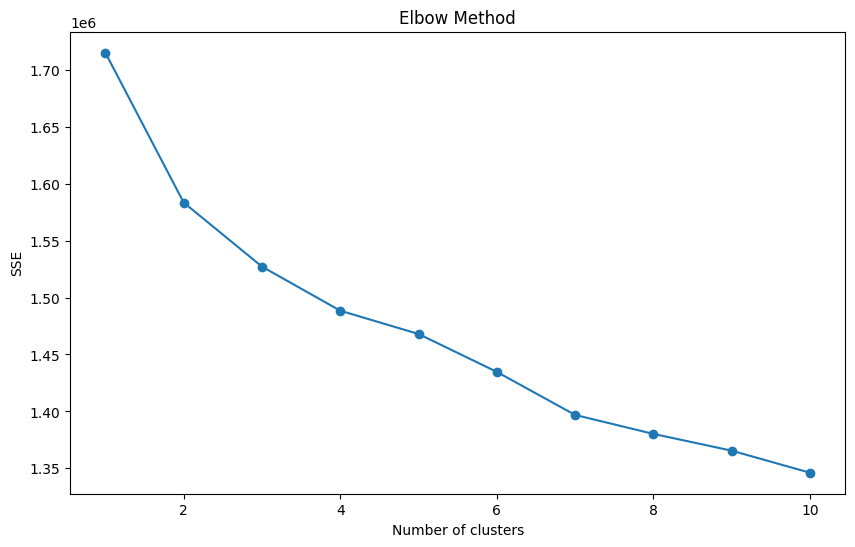

In [6]:
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(embeddings)

sse = []
for k in range(1, 11):  # Testing a range of cluster numbers, for example, 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_embeddings)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
# 4. Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_embeddings)

# 5. KMeans Clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_embeddings)

# 6. Outlier Detection (Distance-based)
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(scaled_embeddings - centroids[clusters], axis=1)
threshold = np.percentile(distances, 80)
outlier_flag = distances > threshold


In [7]:
# Create lists for section names and CIKs
section_names = []
ciks = []
for chunks in chunks_list:
    for section in chunks:
        if section not in ['cik', 'year', 'split']:
            if 'chunks' in chunks[section]:
                section_names.extend([section] * len(chunks[section]['chunks']))
                ciks.extend([chunks['cik']] * len(chunks[section]['chunks']))

# Create DataFrame
df = pd.DataFrame({
    'x': pca_results[:, 0],
    'y': pca_results[:, 1],
    'cluster': clusters,
    'outlier': outlier_flag,
    'section': section_names,
    'cik': ciks
})

In [8]:
# 8. Generate Plots with Plotly
import plotly.express as px

# Plot 1: Clusters in 2D PCA Space
fig1 = px.scatter(
    df,
    x='x',
    y='y',
    color='cluster',
    title='Clusters in 2D PCA Space',
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'},
    color_continuous_scale='Viridis'
)

# Plot 2: Outliers
fig2 = px.scatter(
    df,
    x='x',
    y='y',
    color='outlier',
    title='Outliers in 2D PCA Space',
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'},
    color_discrete_map={True: 'red', False: 'blue'}
)

# Plot 3: Sections
fig3 = px.scatter(
    df,
    x='x',
    y='y',
    color='section',
    title='Sections in 2D PCA Space',
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'},
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Plot 4: Centroids
pca_centroids = pca.transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame({
    'x': pca_centroids[:, 0],
    'y': pca_centroids[:, 1],
    'centroid': [f'Centroid {i}' for i in range(len(pca_centroids))]
})

fig4 = px.scatter(
    df,
    x='x',
    y='y',
    color='cluster',
    title='Clusters with Centroids in 2D PCA Space',
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'},
    color_continuous_scale='Viridis'
)

# Add centroids as a separate scatter plot
fig4.add_scatter(
    x=centroids_df['x'],
    y=centroids_df['y'],
    mode='markers+text',
    marker=dict(
        symbol='x',
        size=12,
        color='magenta',
        line=dict(width=2, color='darkgrey')
    ),
    text=centroids_df['centroid'],
    name='Centroids'
)

# Update layout for all plots
for fig in [fig1, fig2, fig3, fig4]:
    fig.update_layout(
        height=600,
        width=800,
        showlegend=True,
        hovermode='closest'
    )

# Save all plots as HTML files
fig1.write_html("clusters_2d.html")
fig2.write_html("outliers_2d.html")
fig3.write_html("sections_2d.html")
fig4.write_html("centroids_2d.html")

print("All plots have been saved as HTML files. You can open them in your web browser.")

All plots have been saved as HTML files. You can open them in your web browser.


### Explanation of Plots 


The provided visualization is a clear representation of the outcomes from processing a set of 10K filings according to the steps outlined in your task. Here's how each plot corresponds to the tasks and how you can interpret them:

1. Clusters in 2D PCA Space
Purpose: This plot shows how document chunks are grouped into clusters based on their similarities, which were determined through the KMeans clustering algorithm after dimensionality reduction via PCA.

Interpretation: Each color represents a different cluster. Clusters that are close together in the plot suggest that the chunks within these clusters share similar content or themes, while those far apart are less similar.

Use Case: This helps the end user understand thematic structures within the 10K filings, enabling quick identification of documents with similar content or focus.

2. Outliers in 2D PCA Space
Purpose: This plot is specifically designed to identify outliers within the dataset. Outliers are data points that do not well fit the model of their clusters—they are significantly different from the majority of other data points.

Interpretation: Points colored in red are the outliers. Their distance from other points within the same cluster can indicate how much they deviate from the norm within their respective clusters.

Use Case: Identifying outliers is crucial for recognizing unusual or atypical information in the filings, which could be due to various reasons like reporting errors, unique events, or special cases within the company's financials.

3. Sections in 2D PCA Space
Purpose: This plot colors points by the section of the document they belong to. Given that 10K filings are structured into various sections (e.g., management discussion, financial statements, risks), this visualization helps in understanding the dispersion of content across different sections.

Interpretation: Diverse colors indicate different sections. Clusters of the same color reveal that chunks from the same section tend to have similar content, potentially clustering close to each other.

Use Case: This can assist users in pinpointing which sections are more similar across different companies or filings and might highlight sections that have unique content that stands apart from others.

How to Explain This to Stakeholders:
Overview: The PCA plots provide a visual summary of the document data transformed into a two-dimensional space, simplifying the complex data derived from the 10K filings into an easily interpretable form.

Clustering Benefits: Show how clustering has categorized the documents into groups with similar content, aiding in rapid content analysis and comparison.

Outlier Detection: Highlight the importance of outlier detection in catching anomalies within the data, which could lead to deeper investigations for financial analysis or compliance.

Section Analysis: Explain the value in visualizing the data by section, which can help in understanding how different themes or topics are treated across different companies or filings.

In conclusion, these plots collectively enable a holistic understanding of the dataset, fulfilling the goal of the project to not only visualize but also meaningfully interpret the embedded information in a two-dimensional PCA space. This is invaluable for stakeholders who need to grasp complex patterns and anomalies in financial documents quickly.









### Design Choices 

Chunking: Documents are split into smaller chunks (500 words with 50-word overlap) to handle large text data.

Embeddings: Sentence-BERT (all-mpnet-base-v2) converts chunks into 768-dimensional vectors, capturing semantic meaning.

Scaling: Embeddings are standardized to ensure PCA isn’t skewed by feature scales.

PCA: Reduces embeddings to 2D for visualization, retaining maximum variance.

Clustering: KMeans groups chunks into clusters (here, 5 clusters) based on their embeddings.

Outliers: Points farthest from their cluster centroids (top 5% distances) are flagged as outliers.

Visualization: Three plots show clusters, outliers, and sections in 2D space using PCA.

Key Features
Cluster Analysis: Groups similar text chunks for topic exploration.

Outlier Detection: Identifies anomalous sections (e.g., unusual disclosures).

Section Mapping: Reveals how sections (e.g., Risk Factors, MD&A) distribute across the 2D space.

